<a href="https://colab.research.google.com/github/rodrihaack/CIN/blob/main/Class_3_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class 3 - Regression and Classification**

In this notebook we will learn about:


*   Classification
  *   KNN Classifier
  *   SVM Classifier
* Regression
  *   Random Forest Regressor
  *   XGBoost

---

# **1. Classification**

Classification task is used in many areas of science. It's very common that we have some ammount of data that needs to be put into categories, such as images of cats and dogs, stars and galaxies, etc. Here we will be looking at the MNIST dataset, which consists of handwritten numbers. 

The idea is to solve a classification problem by giving the images to some model and obtaining the respective class of each image (from 0 to 9). For this we'll be trying two different algorithms: KNN Classifier and SVM Classifier. 

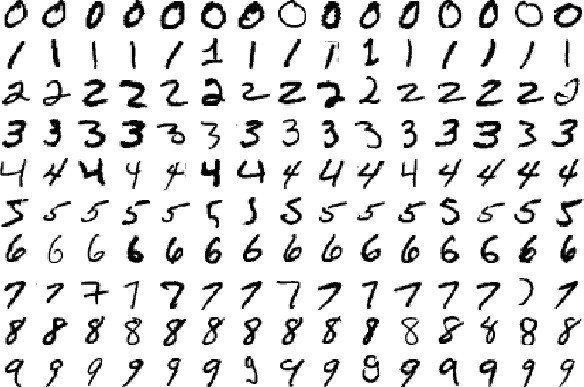

Let's download the data and see what we're dealing with. Since the MNIST database is quite well-known, it is incorporated into the `Tensorflow` library. By using the `load_data` function from Tensorflow we can separate the data between training and test data (60,000 images for training, 10,000 for testing). The images themselves are 28x28 pixel images, where each pixel can have a value from 0 to 256.

In [ ]:
# Downloading the MNIST dataset from Tensorflow
from tensorflow.keras.datasets import mnist

# Separating into train/test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We will plot the first 9 images to see how they look. When dealing with images (in this case, 28x28) the `imshow` function is very useful for showing them without much work.

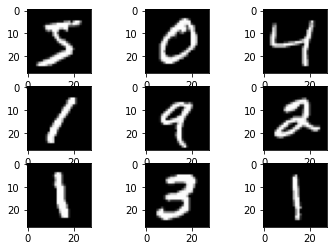

In [ ]:
# Visualizing some MNIST images
import matplotlib.pyplot as plt

for i in range(9):
	# Setting the subplot
	plt.subplot(330 + 1 + i)
	# Plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

To use this dataset with `sklearn` functions, we need to change the X_train and X_test shapes. Currently they are 3-D arrays (N_samples, 28, 28) and we need to convert them into 2-D arrays (N_samples, 784). To do that, we will use the `reshape` function from numpy.

In [ ]:
# Changing X_train and X_test from 3D to 2D
X_train = X_train.reshape((60000, 28*28))
X_test  = X_test.reshape((10000, 28*28))

We will also normalize the data to fall into the 0-1 range instead of the 0-255.

In [ ]:
# Normalizing the data
X_train = X_train/255
X_test  = X_test/255

## **1.1 KNN Classifier**

The K-Nearest Neighbour Classifier is pretty simple, working similarly to the KNN clustering algorithm. The idea is that in D-dimensional space, objects that are close to each other will have the same label. In this case, images that are similar should represent the same number.

KNN Classifier is a "lazy model", which means that it doesn't need any time to train. You can instantly fit some data to it and predict a new value. Even though it's simple, we will see that it works quite well.

Let's use the `sklearn.neighbors` class `KNeighborsClassifier`. It takes an initial argument, the `n_neighbors`, that will dictate the number of nearest values to make the classification. This is a hyperparameter that can be changed and can be optimized, so it is possible to study it's variability.

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Crating and fitting the classifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

Now let's make some predictions based on the KNN classifier. To measure the accuracy of the predictions, we will be using a function from `sklearn` called `accuracy_score`.

In [ ]:
# Predicting and seeing the accuracy
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
acc  = accuracy_score(pred, y_test)

print(f"The accuracy of the model was {acc*100}%")

The accuracy of the model was 96.65%


A 96% accuracy on the test data is pretty good!

Now let's see if we can make it even better by observing different values of `n_neighbors`. 

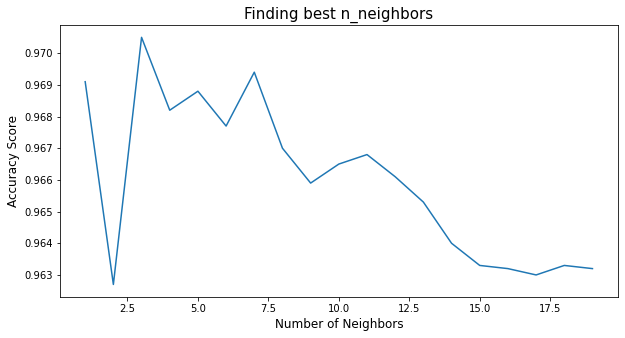

In [ ]:
# Finding the best value of n_neighbors
# !!!WARNING!!! This cell takes ~10 minutes to run

n_neighbors = range(1,20)
acc_scores  = []

for i in n_neighbors:
  # Creating and fitting the KNN
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)

  # Predicting new values
  pred = knn.predict(X_test)

  # Calculating the accuracy
  acc  = accuracy_score(pred, y_test)
  acc_scores.append(acc)

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(n_neighbors, acc_scores)
plt.title("Finding best n_neighbors", fontsize=15)
plt.xlabel("Number of Neighbors", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.show()

In [ ]:
print("Acurracy of using 3 neighbors:", acc_scores[2]*100)

Acurracy of using 3 neighbors: 97.05


We see that the best `n_neighbors` is at 3, with an accuracy of 97.05%!


## **1.2 Support Vector Machine Classifier**

Support Vector Machine (or SVM) is a very high level classification algorithm that tries to create separations in high dimensional spaces by using kernel tricks. It is used in many areas and has been gaining traction in astronomy during the last few years. It can also be used to solve regression problems, but here we'll only talk about classification.

We'll be using the SVM model to classify the MNIST numbers, the same that we did with KNN. Since the data is already prepared, we just need to create the model itself. We'll use the `SVC` (support vector classifier) class from the `sklearn.svm` library. We'll make a "naive" approach by using the default parameters, but there are a lot of things that can be changed. One of the most important is the Kernel function to be used, which in this case we'll use the default Radial Basis Function. You can understand about the differences between each kernel [by going to the link here](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC().fit(X_train, y_train)

# Predicting some values
pred = svm_model.predict(X_test)

Let's also look at the accuracy of the SVM.

In [ ]:
# Accuracy of SVM

acc = accuracy_score(pred, y_test)
print(f"The accuracy of the SVM method was {acc*100}%")

The accuracy of the SVM method was 97.92%


We see here that even for the most naive SVM model, it is still better than the KNN classifier! 

We have a few ways to visualize the result. One of them is through confusion matrices, that will give us an idea of where is the model making wrong predictions. To do that, we have a convenient function from `sklearn.metrics` called `confusion_matrix`. 

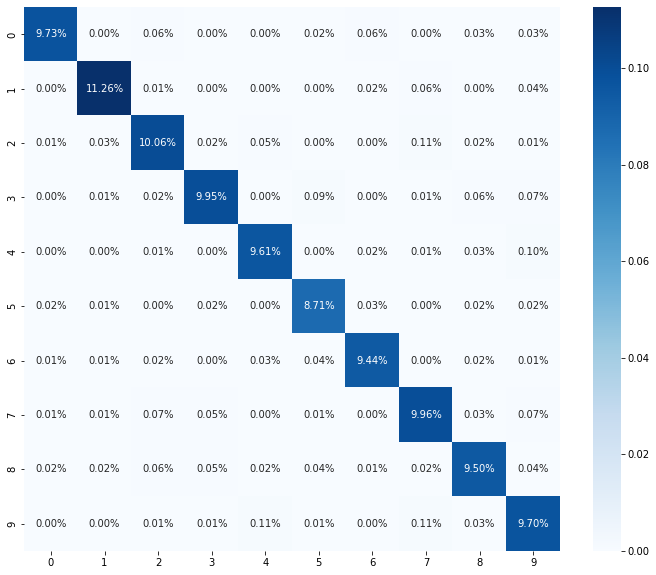

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cf_matrix = confusion_matrix(pred, y_test)

# Plot the figure
plt.figure(figsize=(12  ,10))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

We can see that most of our data is classified pretty well, and that's expected for a 98% accuracy. We don't see any kind of pattern in the confusion matrix.

---

# **Regression**

Regression problems are the ones that involves a continuous range of values to be predicted. For example, when we want to predict the value of a house, predicting the photometric redshift of galaxies, or for forecasting tomorrow's temperature. In all of these cases we want to give a model some data and we expect it to provide us with some number that could fall into a continuous range.

In this example, we'll use more ***real astronomical data***. We'll be using a sample of magnitudes simulating the Southern Photometrical Local Universe Survey (S-PLUS). The S-PLUS is a photometric survey that uses a 12-band system, gathering information about the continuum (with the broad bands) and the spectral lines (with the narrow bands). This dataset conveys ~137,000 galaxies, and for each galaxy we have their S-PLUS photometry, their redshift and their respective stellar mass. It was created by Werle et al. (2021), from the same data set that we usesd in the last class. Let's take a look at the data.

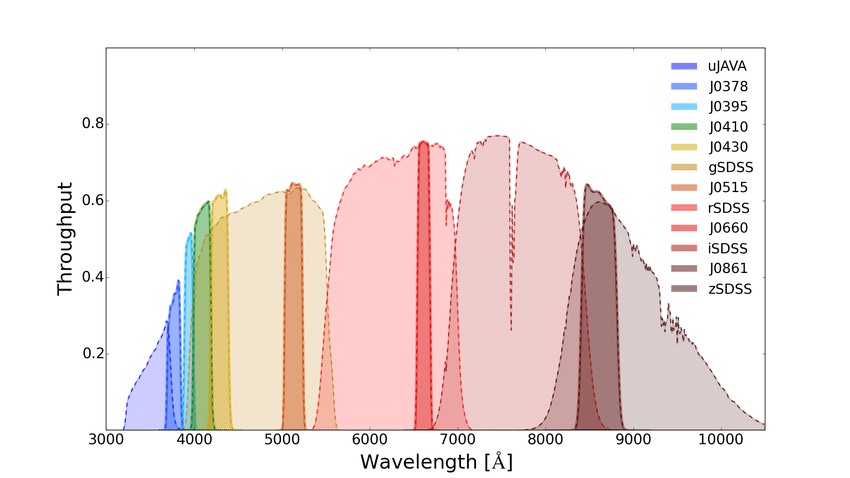

In [ ]:
# Downloading the data set
!wget -q --show-progress https://www.dropbox.com/s/jfncnznop5zr4dq/werle_data.csv

werle_data.csv      100%[===================>]  34.45M  17.3MB/s    in 2.0s    


In [ ]:
# Reading the data
import pandas as pd

data = pd.read_csv("werle_data.csv")
data.dropna(inplace=True)
data.head()

,J0378_syn,J0395_syn,J0410_syn,J0430_syn,J0515_syn,J0660_syn,J0861_syn,u_syn,g_syn,r_syn,i_syn,z_syn,z,logmass
0,15.939736,15.705273,15.617090,14.978927,13.965175,13.283910,12.675839,16.240063,14.368591,13.400926,12.932662,12.623541,0.061449,10.338602
1,16.785647,16.498471,16.484112,15.900542,14.940523,14.341610,13.821706,17.100396,15.325378,14.446666,14.039138,13.776514,0.064104,10.059018
2,17.435518,17.179111,17.033862,16.548705,15.648311,14.968169,14.398270,17.756688,16.010118,15.090969,14.631004,14.350147,0.061799,9.980559
3,13.309112,13.291078,12.780446,12.470791,11.654987,10.976799,10.456193,13.776529,11.941593,11.106364,10.665523,10.381158,0.020542,9.768739
4,18.788828,18.630155,18.215111,17.906129,17.192914,16.552302,16.013644,19.072090,17.473350,16.702353,16.212471,15.958174,0.088349,9.941684


We want to find the mass based on the other features. The first thing we need to do before applying any kind of algorithm is to separate this data into training and testing sets. We can use sklearn's `train_test_split` function to separate 85% for training and 15% for testing.

In [ ]:
# Splitting train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['logmass']), data['logmass'],
                                                    test_size=0.15, random_state=1234)

Now that we have a train and test split, we need to scale this data. Let's use the `sklearn.preprocessing` function `MinMaxScaler`, which scales our data to be between 0 and 1. You can also use the `StandardScaler` the same way that we used in Class 2 if you want. It's important to fit the scaler only on the training data and apply it to both sets. The idea is that you want to mimic a real world application as much as posible by separating the test set from the scaling process.

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

X_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

# Fitting the scalers and transforming the training sets
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))

# Transforming the test set
X_test = X_scaler.transform(X_test)

Now that our data is scaled, let's apply some regression algorithms to see how well we can predict the house prices. We'll be studying two different algorithms: Random Forest Regressor and XGboost Regressor.


## **2.1 Random Forest Regressor**

Random Forest (RF) is a very well-known algorithm. It has been around for a long time, and has always managed to prove it's value as a reliable and simple method. Based on the Decision Trees algorithm, the RF tries to understand how the data can be divided by making decisions based on it's features. Even though the idea behind it is quite simple, RF manages to compete with even Deep Learning algorithms. One of it's great advatages is the interpretability of the network. Since you can see the way RF is making the decisions, you can try to better understand how exactly it's managing to estimate your result.

We'll be using once again the `sklearn.ensamble` library and its `RandomForestRegressor` model. This algorithm takes a lot of different parameters, but the most important one is the `n_estimators`. This refers to "_the number of trees in the forest_" (quote from the documentation), which roughly translates to the depth and complexity of your model. Basically, the higher the number of estimators the better, but the computational time required to fit this model increase as well. We will use 100 estimators (default) since using more would take a long time to train the model. But you can increase this value if you don't mind take a few more minutes or if you have some good hardware.

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Creating and fitting the model
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train.ravel())

# Predicting for the test set and scaling it back
y_pred = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

Let's compute some metrics, such as the Root Mean Square Error and the R2. These two metrics are used when we have both the predictions and the targets, and we want compute the general error of the model. In this case, the lower the RMSE the better, while for the R2 we want higher values nearing 1.

In [ ]:
# Metrics of the RF prediction
from sklearn.metrics import mean_squared_error, r2_score

print("The R2 was:", r2_score(y_test, y_pred))
print("The RMSE was:", np.sqrt(mean_squared_error(y_test, y_pred)))

The R2 was: 0.9827593549652378
The RMSE was: 0.09655464019434037


We can see that the results are pretty good, but let's try another way to visualize the predictions.

We will plot a "prediction plot". Each galaxy in the test set is represented in this plot, with the X-axis showing the predicted value by the RF while the Y-axis shows us the true value from the data set. We want the points to be over the 1x1 line, where predictions=targets.

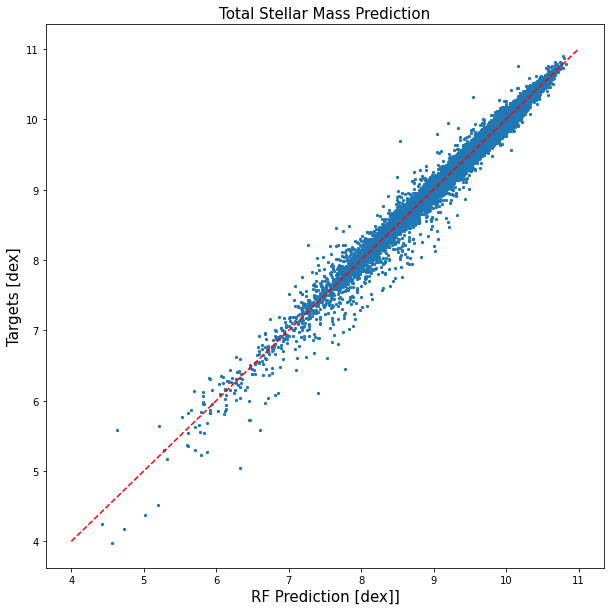

In [ ]:
# Plotting a predict plot
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=5)
plt.plot([4,11],[4,11],'r--')
plt.title("Total Stellar Mass Prediction", fontsize=15)
plt.xlabel("RF Prediction [dex]]", fontsize=15)
plt.ylabel("Targets [dex]", fontsize=15)
plt.show()

We can see that almost all of the predictions fall in the 1x1 line. That's what we wanted! But can we improve this result?

## **2.2 XGBoost**

The eXtreme Gradient Boosting algorithm (XGBoost) is one of the methods that is increasingly gaining popularity. It is based in the gradient boosting method, which is essentially an ensamble of decision trees. It uses weak learners (which are decision trees that do slightly better than random chance), and after seeing what points the weak learner got wrong we create another weak learner to fill that gap, repeating the process until a threshold is met. This ensamble method produces a better result than each decision tree alone, and gradient boosting is usually outperforming Random Forests. It sacrifices the interpretability of decision trees but increases it's performance, and a lot of scientists are adopting this approach.

The XGBoost library is already incorporated in Colab via `xgboost`, so we can easily see it's performance. The regressor itself is the `XGBRegressor` function. Just like RF, the only parameter we need to set is the number of estimators, but there are a lot of other hyperparameters to change. These include learning rate, maximum depth, etc. You can check them all out by [looking at the XGBoost documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor). In this case, we'll also set the number of estimators to 500, since the XGBoost proved to be quicker than the RF. 



In [ ]:
# XGBoost
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=500, silent=True)

# Fitting XGBoost
xgbr.fit(X_train, y_train)

# Predicting for the test set
y_pred = xgbr.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

Let's see the R2 and RMSE.

In [ ]:
# Metrics of the XGBoost prediction
from sklearn.metrics import mean_squared_error, r2_score

print("The R2 was:", r2_score(y_test, y_pred))
print("The RMSE was:", np.sqrt(mean_squared_error(y_test, y_pred)))

The R2 was: 0.9825357770872019
The RMSE was: 0.09717868716851374


We see that both R2 and RMSE were worse than the RF case, but it took about half the time to train. Since the prediction is doing so well, it's not that strange that both methods would get more or less the same results. Let's see the prediction plot to visualize it.

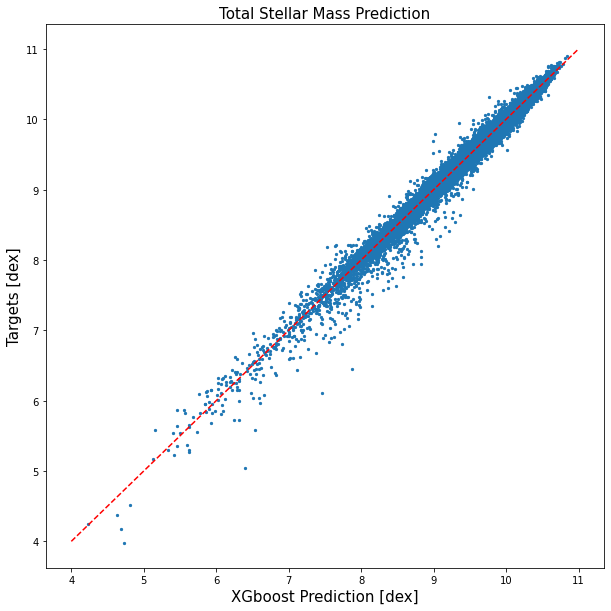

In [ ]:
# Plotting the predict
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=5)
plt.plot([4,11],[4,11],'r--')
plt.title("Total Stellar Mass Prediction", fontsize=15)
plt.xlabel("XGboost Prediction [dex]", fontsize=15)
plt.ylabel("Targets [dex]", fontsize=15)
plt.show()

---

# **Exercise**

Here we want you to predict galactic redshifts from photometric data (these are called photometric redshifts, or photo-zs). We'll use the same S-PLUS magnitudes that were described before, and it's all easily available in the following data set. We want you to use TWO different regression algorithms (can be RF and XGboost) to predict the `z_SDSS` from all other features. After that, we want you to compare their results and see which model performs best.



In [ ]:
# Download photo-z dataset
!wget -q --show-progress https://www.dropbox.com/s/avqg9hndalxugzd/splus-mag-z.dat

data = pd.read_csv('splus-mag-z.dat', sep='\s+')
data.head()

splus-mag-z.dat.1   100%[===================>]   4.07M  8.75MB/s    in 0.5s    


,uJAVA_petro,F378_petro,F395_petro,F410_petro,F430_petro,g_petro,F515_petro,r_petro,F660_petro,i_petro,F861_petro,z_petro,z_SDSS
0,18.71,18.69,18.50,18.12,17.78,17.43,17.09,16.89,16.83,16.56,16.54,16.45,0.111
1,18.26,18.12,18.28,17.32,16.95,16.67,16.24,15.97,15.90,15.61,15.52,15.41,0.082
2,19.38,19.45,18.76,18.60,18.50,18.07,17.69,17.55,17.47,17.25,17.31,17.18,0.086
3,20.30,19.73,20.01,19.18,18.91,18.36,18.00,17.75,17.68,17.51,17.46,17.34,0.111
4,19.49,18.98,18.64,18.64,18.02,17.14,16.61,16.06,15.93,15.65,15.54,15.38,0.162
